In [246]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn import tree

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pydotplus

from scipy.stats import ttest_1samp, wilcoxon, shapiro
from statsmodels.stats.power import ttest_power

from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix  


from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import cross_val_score


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [59]:
S= pd.read_csv("Dataset_spine.csv")
S.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope(numeric),Direct_tilt(numeric),thoracic_slope(numeric),cervical_tilt(numeric),sacrum_angle(numeric),scoliosis_slope(numeric),Dependent variable,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN,NaN,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN,NaN,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,NaN,NaN,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN,NaN,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN,NaN,NaN


In [60]:
S=S.drop(columns=['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'])


In [61]:
S.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope(numeric),Direct_tilt(numeric),thoracic_slope(numeric),cervical_tilt(numeric),sacrum_angle(numeric),scoliosis_slope(numeric),Dependent variable
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [ ]:
S['Dependent variable']= S["Dependent variable"].replace({'Normal':1,'Abnormal':0})

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


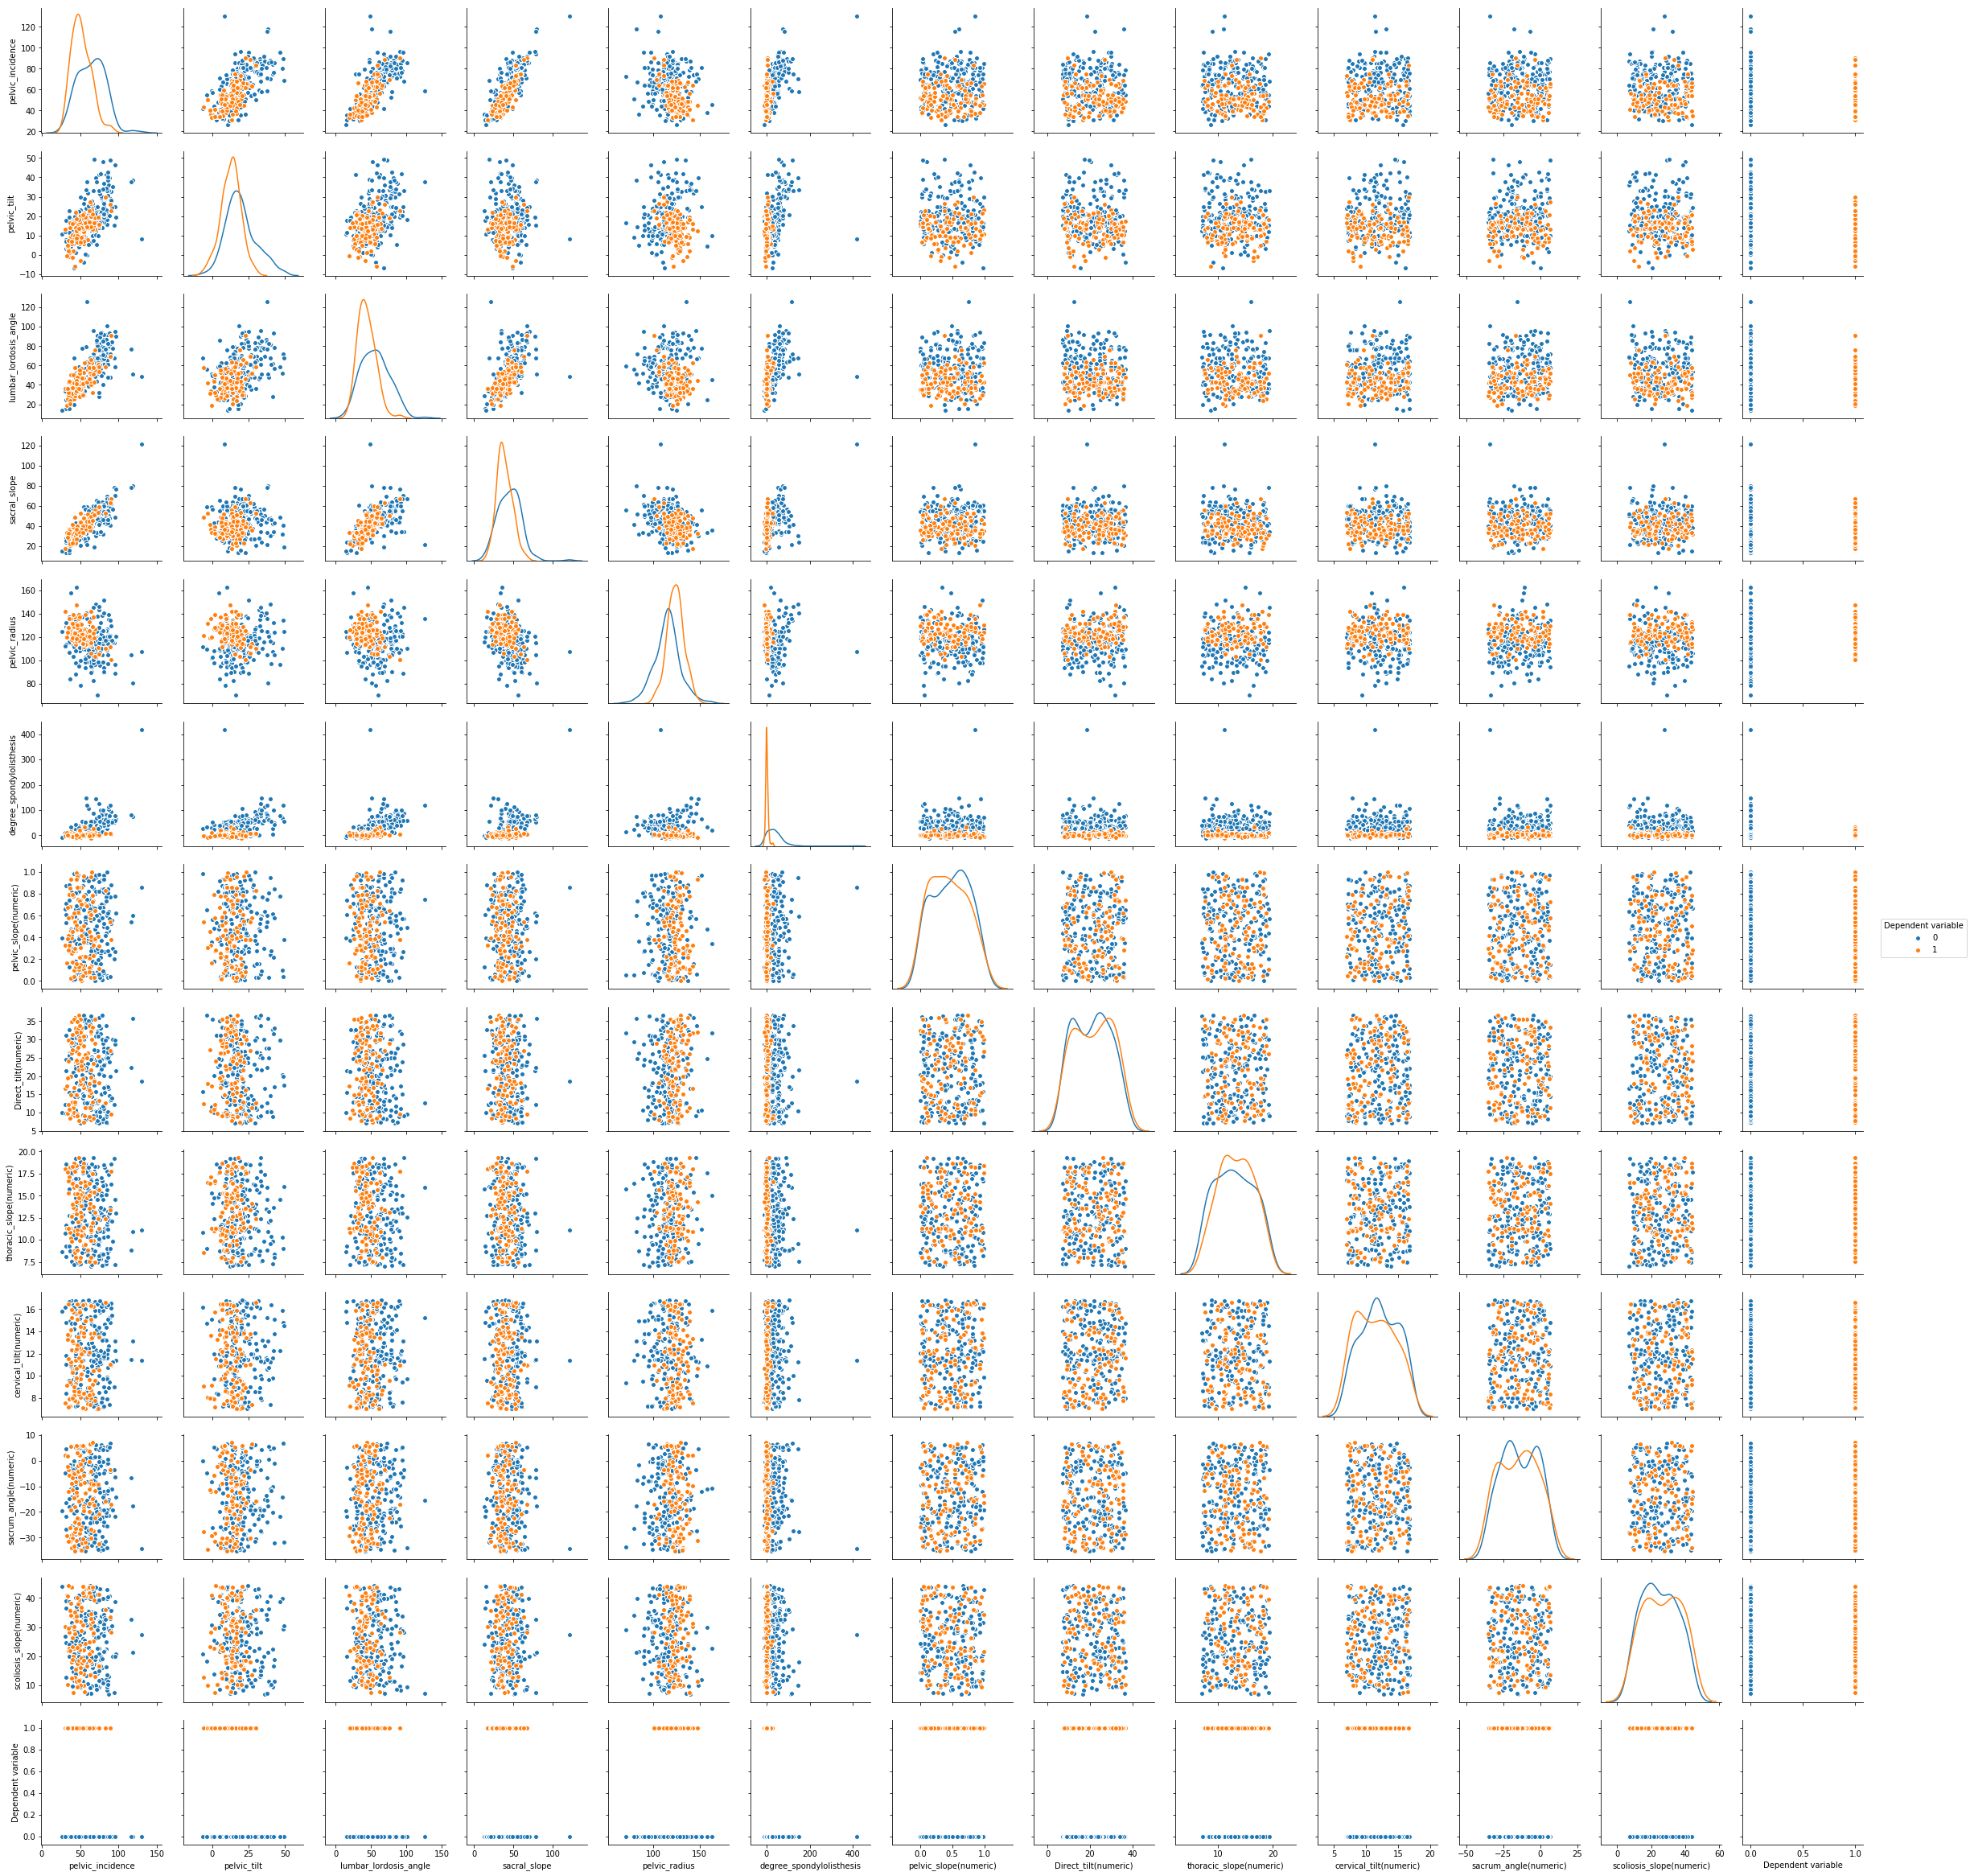

In [259]:
sns.pairplot(S, hue='Dependent variable', diag_kind= 'kde')

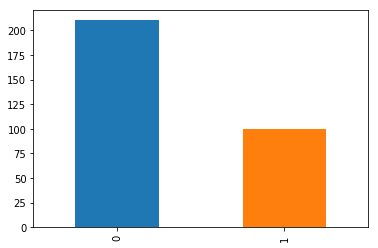

In [256]:
dataset["Dependent variable"].value_counts().sort_index().plot.bar()


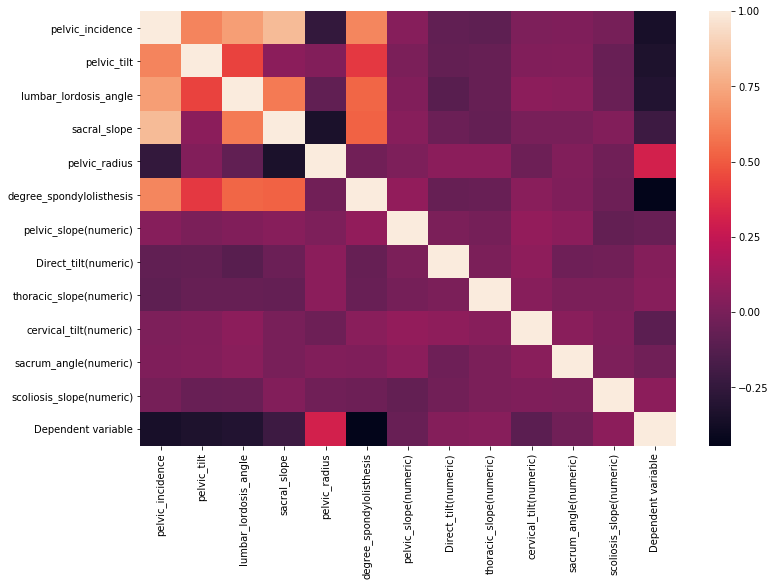

In [258]:
plt.subplots(figsize=(12,8))
sns.heatmap(S.corr())

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 13 Text xticklabel objects>)

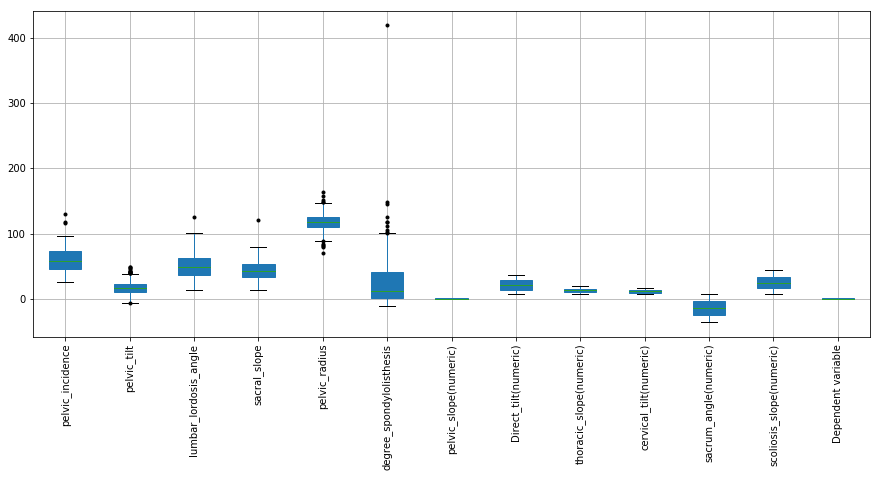

In [261]:
plt.subplots(figsize=(15,6))
S.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)

The combined boxplots show that some of our attributes are not normal and may contain some outliers

In [65]:
S.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope(numeric)       0
Direct_tilt(numeric)        0
thoracic_slope(numeric)     0
cervical_tilt(numeric)      0
sacrum_angle(numeric)       0
scoliosis_slope(numeric)    0
Dependent variable          0
dtype: int64

data doesnt contain any nan values

In [66]:
S.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'pelvic_slope(numeric)', 'Direct_tilt(numeric)',
       'thoracic_slope(numeric)', 'cervical_tilt(numeric)',
       'sacrum_angle(numeric)', 'scoliosis_slope(numeric)',
       'Dependent variable'],
      dtype='object')

In [170]:
x=S.iloc[:,:-1]
y=S.iloc[:,-1]


# Decision Tree

In [171]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [187]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(xtrain)
xtrain = scaler.transform(xtrain)  
xtest = scaler.transform(xtest) 

In [188]:
train_data_acc = []
train_data_err = []
for i in range(1,11):
    d_tree = tree.DecisionTreeClassifier(criterion="gini",random_state=1,max_depth=i)
    d_tree = d_tree.fit(xtrain,ytrain)
    predict1 = d_tree.predict(xtrain)
    CT = pd.crosstab(ytrain,predict1)
    acc = (CT[0][0]+CT[1][1])/(len(xtrain))
    err = (CT[0][1]+CT[1][0])/(len(xtrain))
    train_data_acc.append(acc)
    train_data_err.append(err)

In [189]:
test_data_acc = []
test_data_err = []
for i in range(1,11):
    d_tree = tree.DecisionTreeClassifier(criterion="gini",random_state=1,max_depth=i)
    d_tree = d_tree.fit(xtrain,ytrain)
    predict2 = d_tree.predict(xtest)
    CT = pd.crosstab(ytest,predict2)
    acc = (CT[0][0]+CT[1][1])/(len(xtest))
    err = (CT[0][1]+CT[1][0])/(len(xtest))
    test_data_acc.append(acc)
    test_data_err.append(err)

In [190]:
max_acc = max(test_data_acc)
max_dep = test_data_acc.index(max_acc)+1
print("Maximum Depth : ",max_dep)


Maximum Depth :  2


Maximum acuuracy of our model comes on depth of 2

In [191]:
df = pd.DataFrame([train_data_acc,test_data_acc,train_data_err,test_data_err]).T
df.columns = ['Train Accuracy','Test Accuracy','Train Error','Test Error']
df

,Train Accuracy,Test Accuracy,Train Error,Test Error
0,0.778802,0.795699,0.221198,0.204301
1,0.838710,0.827957,0.161290,0.172043
2,0.898618,0.763441,0.101382,0.236559
3,0.926267,0.806452,0.073733,0.193548
4,0.963134,0.774194,0.036866,0.225806
5,0.986175,0.784946,0.013825,0.215054
6,0.990783,0.806452,0.009217,0.193548
7,1.000000,0.774194,0.000000,0.225806
8,1.000000,0.774194,0.000000,0.225806
9,1.000000,0.774194,0.000000,0.225806


In [192]:
print(df[df['Test Accuracy']==max(test_data_acc)])
df.index[df['Test Accuracy']==max(test_data_acc)]

   Train Accuracy  Test Accuracy  Train Error  Test Error
1         0.83871       0.827957      0.16129    0.172043


Int64Index([1], dtype='int64')

Accuracy at depth 2 is 0.83 for train data and 0.82 for test data. This shows us that our test data is a good representation 
our train data. Also , our model works excellently on the data set

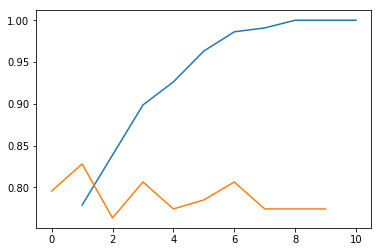

In [253]:
plt.plot(range(1,11),train_data_acc,test_data_acc)

the graph shows the as depth increases accuracy of train data also increases and will get constant at on point. For test data the 
accuracy values changes a lot but becomes constant later on

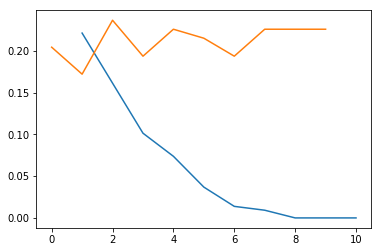

In [194]:
plt.plot(range(1,11),train_data_err,test_data_err)

This graph shows the error in our model as our depth increases. For our train data at lower level of depth error is high, it decreases 
as depth increases and then becomes constant. For the test data the error values here are inconsistent but then become constant later on

# cross validation

In [ ]:
Now, we perform the cross validation of our model.

In [262]:
depth=[]
for i in range(3,20):
    clf=tree.DecisionTreeClassifier(max_depth=i)
    scores=cross_val_score(estimator=clf, X=xtrain, y=ytrain, cv=3)
    depth.append((i,scores.mean()))
print(depth) 

[(3, 0.8161466260781328), (4, 0.7838026382546931), (5, 0.7837392186707254), (6, 0.7930618975139523), (7, 0.7560248604769152), (8, 0.7744799594114662), (9, 0.797564687975647), (10, 0.7790461694571283), (11, 0.7654743784880771), (12, 0.82058599695586), (13, 0.7745433789954338), (14, 0.7744799594114663), (15, 0.7792364282090309), (16, 0.7700405885337392), (17, 0.7789827498731609), (18, 0.7746702181633688), (19, 0.7836123795027904)]


In [263]:
clf= tree.DecisionTreeClassifier(criterion="gini", random_state=1, max_depth=4)
clf= clf.fit(xtrain,ytrain)

In [264]:
pred= clf.predict(xtest)
print(pd.crosstab(ytest, pred))

col_0                0   1
Dependent variable        
0                   56  10
1                    8  19


In [265]:
b=pd.crosstab(ytest, pred)
acc= (b[0][0]+b[1][1])/len(xtest)

In [266]:
acc

0.8064516129032258

After validation, our accuracy comes out to be 0.80.

Therefore, our model is a good model, which predicts the abnormality correctly by 83% on train data, 82% on test data and on validation it predicts 
at 80% accuracy

# Random Forest

In [195]:
rf_test_acc = []
rf_test_err = []
for i in range(1,9):
    rfc = RandomForestClassifier(n_estimators=200, max_features=i)
    rfc.fit(xtrain,ytrain)
    predict3 = rfc.predict(xtest)
    CT = pd.crosstab(ytest,predict3)
    acc = (CT[0][0]+CT[1][1])/(len(xtest))
    err = (CT[0][1]+CT[1][0])/(len(xtest))
    rf_test_acc.append(acc)
    rf_test_err.append(err)
rf_test_acc

[0.8064516129032258,
 0.8387096774193549,
 0.8279569892473119,
 0.8387096774193549,
 0.8279569892473119,
 0.8387096774193549,
 0.8279569892473119,
 0.8172043010752689]

In [196]:
rf_train_acc = []
rf_train_err = []
for i in range(1,9):
    rfc = RandomForestClassifier(n_estimators=200, max_features=i)
    rfc.fit(xtrain,ytrain)
    predict4 = rfc.predict(xtrain)
    CT = pd.crosstab(ytrain,predict4)
    acc = (CT[0][0]+CT[1][1])/(len(xtrain))
    err = (CT[0][1]+CT[1][0])/(len(xtrain))
    rf_train_acc.append(acc)
    rf_train_err.append(err)

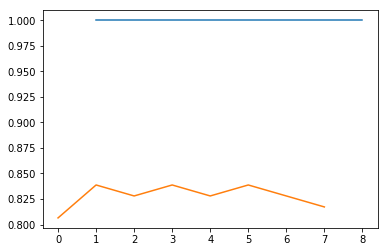

In [197]:
plt.plot(range(1,9),rf_train_acc,rf_test_acc)

In [198]:
features = P.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

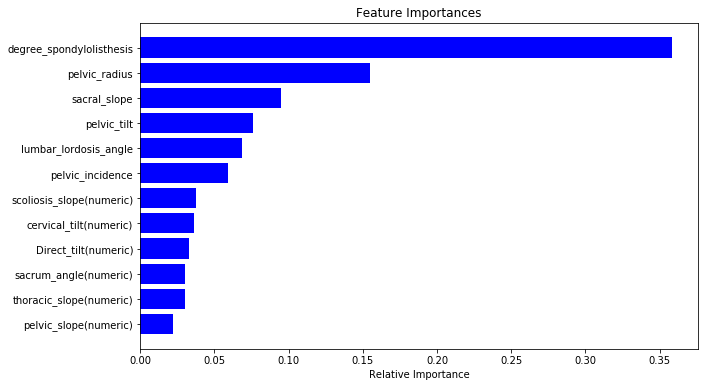

In [199]:
plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)),features[indices])
plt.xlabel('Relative Importance')
plt.show()

The given graph shows the importance of the given features with respect to gien dependent variable. Here its degree_spondylolithesis , whci means because of this attribute are model is mainly predicting abnormality
with accuracy 83%.



# KNN

In [234]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principle value 3', 'principle value 4','principle value 5','principle value 6'])

In [236]:
finalDf = pd.concat([principalDf, S[['Dependent variable']]], axis = 1)
pca.explained_variance_ratio_


array([0.27326804, 0.10379511, 0.09525037, 0.08796213, 0.08532777,
       0.08063835])

In [237]:
from sklearn.decomposition import PCA
pca = PCA(.95)

In [239]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(xtrain)
train = scaler.transform(xtrain)
test= scaler.transform(xtest)

In [241]:
pca = PCA(.95)

In [242]:
pca.fit(train)


PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [243]:
train = pca.transform(train)
test = pca.transform(test)

In [203]:

Kclassifier = KNeighborsClassifier(n_neighbors=5)  
Kclassifier.fit(xtrain, ytrain) 

ypredict5 = Kclassifier.predict(xtest) 

print(confusion_matrix(ytest, ypredict5))  
print(classification_report(ytest, ypredict5))  

[[49 17]
 [11 16]]
             precision    recall  f1-score   support

          0       0.82      0.74      0.78        66
          1       0.48      0.59      0.53        27

avg / total       0.72      0.70      0.71        93



In [204]:
knn_error = []
knn_acc = []
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    predict6 = knn.predict(xtest)
    CT = pd.crosstab(ytest,predict6)
    acc = (CT[0][0]+CT[1][1])/(len(xtest))
    err = (CT[0][1]+CT[1][0])/(len(xtest))
    knn_acc.append(acc)
    knn_error.append(err)

Text(0,0.5,'Mean Error')

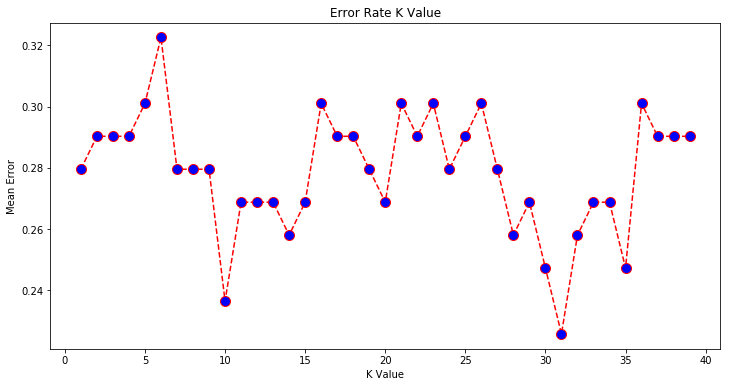

In [205]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), knn_error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

Text(0,0.5,'Mean Accuracy')

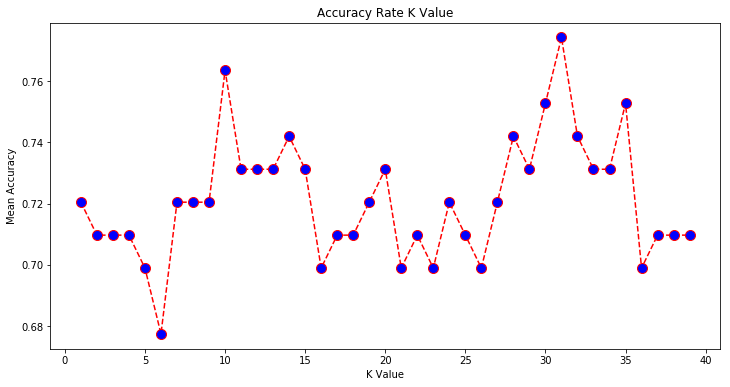

In [206]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), knn_acc, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Accuracy')

In [207]:
max_acc = max(knn_acc)
max_k = knn_acc.index(max_acc)+1
print("Maximum k value : ",max_k)

Maximum k value :  31


In [210]:
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(xtrain, ytrain)
pred = knn.predict(xtest)
CT = pd.crosstab(ytest,pred)
acc = (CT[0][0]+CT[1][1])/(len(xtest))
err = (CT[0][1]+CT[1][0])/(len(xtest))
acc,err

(0.7741935483870968, 0.22580645161290322)

Here, our model predicts with maximum accuracy 77% and minimum error 22.6% when the value of k=31. Which means model will take 
average value of its k=31 nearest neighbours. Had the k value been more for this data type, our model would become a baseline model.

Basically, 31 rows of data are taken of humans and they are compared , and then they are further compared. It predicts the back pain on the basis of condition of other 31 humans (with back pain or not)
So, our model build with KNN is good, not excellent.

# Naive Bayes

In [225]:

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(xtrain, ytrain)

y_predict=clf.predict(xtest)



In [227]:
acc=metrics.accuracy_score(ytest,y_predict)
acc

0.8172043010752689

In [229]:
cm= metrics.confusion_matrix(ytest,y_predict)
cm

array([[52, 14],
       [ 3, 24]], dtype=int64)

In [232]:
print(classification_report(ytest, y_predict))  

             precision    recall  f1-score   support

          0       0.95      0.79      0.86        66
          1       0.63      0.89      0.74        27

avg / total       0.85      0.82      0.82        93



In [230]:
#True negative Rate
tnr= cm[0,0]/(cm[0,0]+cm[0,1])
tnr

0.7878787878787878

In [231]:
tpr=cm[1,1]/(cm[1,1]+cm[1,0])
tpr

0.8888888888888888

With Naive Bayes, we predict abnormality with 81% accuracy, where our prcision value is 0.85 and recall is 0.82. 
Naive Bayes gives predicts the chances of abnormality, with other attributes in the columns as our independent variables present 
in the body of the human suffering from back pain

# Logistic Regression

In [217]:
model=LogisticRegression()

In [218]:
model.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [221]:
ypredict7=model.predict(xtest)
acc=metrics.accuracy_score(ytest,ypredict7)
cm= metrics.confusion_matrix(ytest,ypredict7)
print(acc)
print(cm)

0.8602150537634409
[[59  7]
 [ 6 21]]


In [222]:
#True negative Rate
tnr= cm[0,0]/(cm[0,0]+cm[0,1])
tnr

0.8939393939393939

In [223]:
#True positive Rate
tpr=cm[1,1]/(cm[1,1]+cm[1,0])
tpr

0.7777777777777778

0.8358585858585857


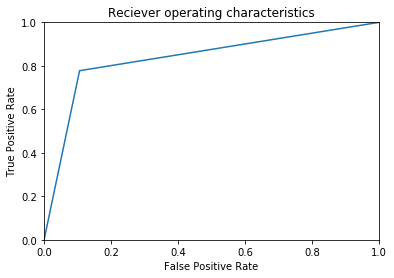

In [224]:
fpr,tpr,_=roc_curve(ytest,ypredict7)
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.figure()
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])

plt.ylim([0.0,1.0])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Reciever operating characteristics')

plt.show()

Our TNR>TPR, which means the specificity of our data is more than the sensitivity of our data. Here the area under the roc curve is 0.835 which is greater
than 0.80 , which means our model is excellent. It will predict the back pain/ abnormality of a human with the given conditions accurately

In [268]:
AccTable = {'Models': ['Decision Tree', 'Random Forest', 'K Nearest Neighbour', 'Naive Bayes', 'Logistic Regression'], 'Accuracy': [0.827, 0.838,0.774,0.810,0.860]}
df = pd.DataFrame(data=AccTable)
df

,Models,Accuracy
0,Decision Tree,0.827
1,Random Forest,0.838
2,K Nearest Neighbour,0.774
3,Naive Bayes,0.810
4,Logistic Regression,0.860


Above is the table for our different models and their accuracies. Logistic regression gives us the best accuracy. For this dataset we should 
predict with Logistic regression.